<a href="https://colab.research.google.com/github/ArmandoSep/ChildAbuse/blob/master/Child_Abuse_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import the needed libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# Load the data set for the first visualization
xls = pd.ExcelFile('https://healthdata.gov/sites/default/files/Combined_CM_2018_data_tables.xlsx')
df1 = pd.read_excel(xls, 'Child_Victims_2014-2018')
df1.head()

,State,2014 Victims (unique count),2015 Victims (unique count),2016 Victims (unique count),2017 Victims (unique count),2018 Victims (unique count),Percent Change from 2014 to 2018,"2014 Rate per 1,000 Children","2015 Rate per 1,000 Children","2016 Rate per 1,000 Children","2017 Rate per 1,000 Children","2018 Rate per 1,000 Children"
0,Alabama,8697,8466,10157,10847,12158,39.8,7.9,7.7,9.2,9.9,11.2
1,Alaska,2484,2898,3142,2783,2615,5.3,13.3,15.6,16.8,15.0,14.2
2,Arizona,13877,11955,10841,9909,15504,11.7,8.5,7.3,6.6,6.0,9.4
3,Arkansas,8971,9204,9707,9334,8538,-4.8,12.7,13.0,13.7,13.2,12.1
4,California,75033,72000,68663,65342,63795,-15.0,8.2,7.9,7.6,7.2,7.1


In [3]:
# Drop the unwanted columns (unique counts) and the 'nationa' row
df1 = df1.drop(['Percent Change from 2014 to 2018'], axis=1).drop(index=52)
df1.head()

,State,2014 Victims (unique count),2015 Victims (unique count),2016 Victims (unique count),2017 Victims (unique count),2018 Victims (unique count),"2014 Rate per 1,000 Children","2015 Rate per 1,000 Children","2016 Rate per 1,000 Children","2017 Rate per 1,000 Children","2018 Rate per 1,000 Children"
0,Alabama,8697,8466,10157,10847,12158,7.9,7.7,9.2,9.9,11.2
1,Alaska,2484,2898,3142,2783,2615,13.3,15.6,16.8,15.0,14.2
2,Arizona,13877,11955,10841,9909,15504,8.5,7.3,6.6,6.0,9.4
3,Arkansas,8971,9204,9707,9334,8538,12.7,13.0,13.7,13.2,12.1
4,California,75033,72000,68663,65342,63795,8.2,7.9,7.6,7.2,7.1


In [4]:
df1 = df1.rename(columns={'2014 Rate per 1,000 Children': '14 Rate', "2015 Rate per 1,000 Children": "15 Rate",
                   "2016 Rate per 1,000 Children":"16 Rate" , "2017 Rate per 1,000 Children":"17 Rate", 
                   "2018 Rate per 1,000 Children":"18 Rate", '2014 Victims (unique count)': '14 count', 
                   '2015 Victims (unique count)': '15 count', '2016 Victims (unique count)': '16 count', 
                   '2017 Victims (unique count)': '17 count', '2018 Victims (unique count)': '18 count'})
df1.head()

,State,14 count,15 count,16 count,17 count,18 count,14 Rate,15 Rate,16 Rate,17 Rate,18 Rate
0,Alabama,8697,8466,10157,10847,12158,7.9,7.7,9.2,9.9,11.2
1,Alaska,2484,2898,3142,2783,2615,13.3,15.6,16.8,15.0,14.2
2,Arizona,13877,11955,10841,9909,15504,8.5,7.3,6.6,6.0,9.4
3,Arkansas,8971,9204,9707,9334,8538,12.7,13.0,13.7,13.2,12.1
4,California,75033,72000,68663,65342,63795,8.2,7.9,7.6,7.2,7.1


In [0]:
# Replace missing values
df1 = df1.replace({'-': 0})

In [6]:
# Create a 2014 dataset to later concatenate
df_14 = df1[['State','14 Rate', '14 count']]
df_14 = df_14.rename(columns={'14 Rate': 'Rate', '14 count': 'count'})
df_14.insert(1, 'Year', 2014)
df_14.head()

,State,Year,Rate,count
0,Alabama,2014,7.9,8697
1,Alaska,2014,13.3,2484
2,Arizona,2014,8.5,13877
3,Arkansas,2014,12.7,8971
4,California,2014,8.2,75033


In [7]:
# Create a 2015 dataset to later concatenate
df_15 = df1[['State','15 Rate', '15 count']]
df_15 = df_15.rename(columns={'15 Rate': 'Rate', '15 count': 'count'})
df_15.insert(1, 'Year', 2015)
df_15.head()

,State,Year,Rate,count
0,Alabama,2015,7.7,8466
1,Alaska,2015,15.6,2898
2,Arizona,2015,7.3,11955
3,Arkansas,2015,13.0,9204
4,California,2015,7.9,72000


In [8]:
# Create a 2016 dataset to later concatenate
df_16 = df1[['State','16 Rate', '16 count']]
df_16 = df_16.rename(columns={'16 Rate': 'Rate', '16 count': 'count'})
df_16.insert(1, 'Year', 2016)
df_16.head()

,State,Year,Rate,count
0,Alabama,2016,9.2,10157
1,Alaska,2016,16.8,3142
2,Arizona,2016,6.6,10841
3,Arkansas,2016,13.7,9707
4,California,2016,7.6,68663


In [9]:
# Create a 2017 dataset to later concatenate
df_17 = df1[['State','17 Rate', '17 count']]
df_17 = df_17.rename(columns={'17 Rate': 'Rate', '17 count': 'count'})
df_17.insert(1, 'Year', 2017)
df_17.head()

,State,Year,Rate,count
0,Alabama,2017,9.9,10847
1,Alaska,2017,15.0,2783
2,Arizona,2017,6.0,9909
3,Arkansas,2017,13.2,9334
4,California,2017,7.2,65342


In [10]:
# Create a 2018 dataset to later concatenate
df_18 = df1[['State','18 Rate', '18 count']]
df_18 = df_18.rename(columns={'18 Rate': 'Rate', '18 count': 'count'})
df_18.insert(1, 'Year', 2018)
df_18.head()

,State,Year,Rate,count
0,Alabama,2018,11.2,12158
1,Alaska,2018,14.2,2615
2,Arizona,2018,9.4,15504
3,Arkansas,2018,12.1,8538
4,California,2018,7.1,63795


In [11]:
# Concatenate the previous DataFrames into one
df_child = pd.concat([df_14, df_15, df_16, df_17, df_18])
print(df_child.dtypes)
df_child.tail()

State     object
Year       int64
Rate     float64
count      int64
dtype: object


,State,Year,Rate,count
47,Virginia,2018,3.3,6132
48,Washington,2018,2.7,4498
49,West Virginia,2018,19.1,6946
50,Wisconsin,2018,3.9,5017
51,Wyoming,2018,7.7,1044


In [12]:
# Reset index to avoid errors
#### Drop 'index'
df_child = df_child.reset_index().drop(['index'], axis=1)
df_child.tail()

,State,Year,Rate,count
255,Virginia,2018,3.3,6132
256,Washington,2018,2.7,4498
257,West Virginia,2018,19.1,6946
258,Wisconsin,2018,3.9,5017
259,Wyoming,2018,7.7,1044


In [13]:
df_child['count'].astype(int)

0       8697
1       2484
2      13877
3       8971
4      75033
       ...  
255     6132
256     4498
257     6946
258     5017
259     1044
Name: count, Length: 260, dtype: int64

###Plot the Child Abuse data

In [14]:
# Create a current year function
current_year = 2018
dff = df_child[df_child['Year'].eq(current_year)].sort_values(by='Rate', ascending=False).head(10)
dff

,State,Year,Rate,count
225,Kentucky,2018,23.5,23752
257,West Virginia,2018,19.1,6946
229,Massachusetts,2018,18.9,25812
248,Rhode Island,2018,17.8,3644
230,Michigan,2018,17.4,37703
249,South Carolina,2018,17.3,19130
240,New York,2018,16.9,68785
239,New Mexico,2018,16.6,8024
222,Indiana,2018,16.4,25731
234,Montana,2018,16.4,3763


In [15]:
df_child['count'].count()

260

In [16]:
count = df_child[df_child['Year'] == current_year]['count'].sum()
count

#df[df['a'] == 1]['b'].sum()

677529

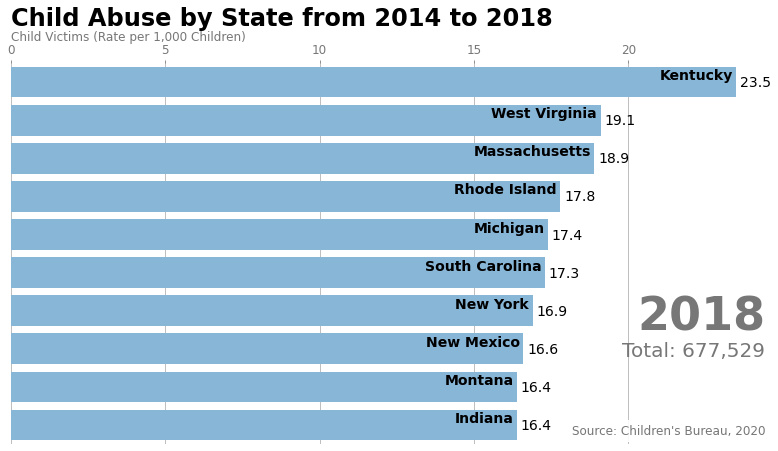

In [74]:
# Plot data
fig, ax = plt.subplots(figsize=(13, 7))

def draw_barchart(current_year):
    dff = df_child[df_child['Year'].eq(current_year)].sort_values(by='Rate', ascending=True).tail(10)
    count = df_child[df_child['Year'] == current_year]['count'].sum()
    ax.clear()
    
    ax.barh(dff['State'], dff['Rate'], color='#88b6d7')
    dx = dff['Rate'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Rate'], dff['State'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     value,  size=14, ha='left',  va='center')
    ax.text(1.04, 0.3, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(1.04, 0.23, f'Total: {count:,}', transform=ax.transAxes, color='#777777', size=20, ha='right', weight=460)

#    ax.text(0, 1.06, ' ', transform=ax.transAxes, size=0.1, color='#ffffff')
    ax.text(0, 1.06, 'Child Victims (Rate per 1,000 Children)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Child Abuse by State from 2014 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1.04, 0.017, "Source: Children's Bureau, 2020", transform=ax.transAxes, 
            color='#777777', ha='right', fontsize=12, va='bottom', 
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

### Animate the chart

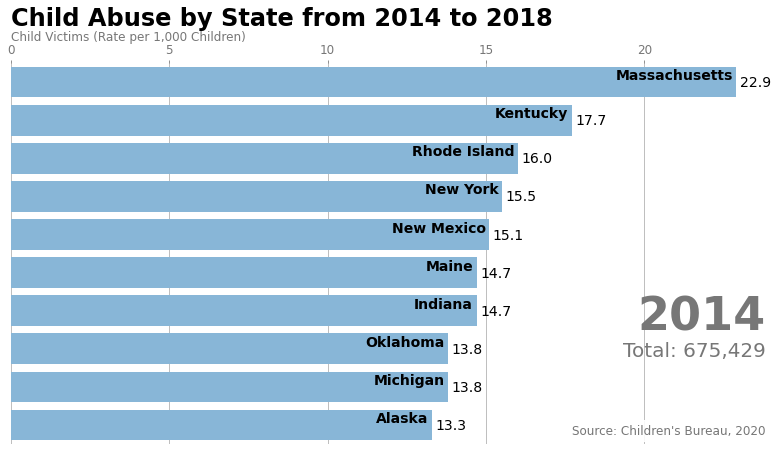

In [75]:
fig, ax = plt.subplots(figsize=(13, 7))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2014, 2019))
HTML(animator.to_jshtml(fps=0.8))

In [19]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

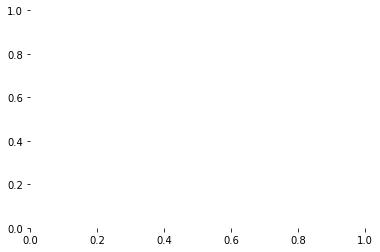

In [76]:
# Save the chart as a gif to upload it to Medium
animator.save('child.gif', writer='imagemagick', fps=0.8)

# Unemployment by State 
Link of [dataset](https://https://www.bls.gov/web/laus/ststdsadata.zip)

Source: Bureau of Labor Statistics

In [21]:
# Load Dataset

!wget https://www.bls.gov/web/laus/ststdsadata.zip

--2020-05-23 20:28:23--  https://www.bls.gov/web/laus/ststdsadata.zip
Resolving www.bls.gov (www.bls.gov)... 23.204.79.80, 2600:1407:21:2b7::18b9, 2600:1407:21:29d::18b9
Connecting to www.bls.gov (www.bls.gov)|23.204.79.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2220056 (2.1M) [application/x-zip-compressed]
Saving to: ‘ststdsadata.zip’

ststdsadata.zip     100%[===================>]   2.12M  9.37MB/s    in 0.2s    

2020-05-23 20:28:24 (9.37 MB/s) - ‘ststdsadata.zip’ saved [2220056/2220056]



In [22]:
# Unzip dataset
!unzip ststdsadata.zip

Archive:  ststdsadata.zip
  inflating: ststdsadata.xlsx        


In [23]:
df2 = pd.read_excel('ststdsadata.xlsx')
df2.head()

,"States and selected areas: Employment status of the civilian noninstitutional population,",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,"January 1976 to date, seasonally adjusted",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIPS Code,State and area,Period,NaN,Civilian non-institutional population,Civilian labor force,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Total,Percent of population,Employment,NaN,Unemployment,NaN
4,NaN,NaN,Year,Month,NaN,NaN,NaN,Total,Percent of population,Total,Rate


### Let's clean the dataset

In [24]:
# Drop unneeded columns
df2 = df2.drop(['States and selected areas:  Employment status of the civilian noninstitutional population,','Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
df2.head(10)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 10
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,State and area,Period,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,Year,Month,Rate
5,NaN,Labor force,Labor force,rate
6,NaN,NaN,NaN,NaN
7,Alabama,1976,01,6.7
8,Alaska,1976,01,7.1
9,Arizona,1976,01,10.3


In [25]:
# Drop unneeded rows
df2 = df2.drop(axis=0, index=[0,1,2,3,4,5,6])
df2.head(10)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 10
7,Alabama,1976,01,6.7
8,Alaska,1976,01,7.1
9,Arizona,1976,01,10.3
10,Arkansas,1976,01,7.4
11,California,1976,01,9.1
12,Los Angeles County,1976,01,8.8
13,Colorado,1976,01,5.5
14,Connecticut,1976,01,9.8
15,Delaware,1976,01,7.7
16,District of Columbia,1976,01,9


In [26]:
# Rename columns and reset index
df2 = df2.rename(columns={'Unnamed: 1':'State', 'Unnamed: 2':'Year', 'Unnamed: 3':'Month', 'Unnamed: 10':'Rate'}).reset_index().drop(['index'], axis=1)
df2

,State,Year,Month,Rate
0,Alabama,1976,01,6.7
1,Alaska,1976,01,7.1
2,Arizona,1976,01,10.3
3,Arkansas,1976,01,7.4
4,California,1976,01,9.1
...,...,...,...,...
28191,Virginia,2020,04,10.6
28192,Washington,2020,04,15.4
28193,West Virginia,2020,04,15.2
28194,Wisconsin,2020,04,14.1


Combine the year and month to a single column

In [27]:
df2['Date'] = pd.to_datetime(df2[['Year', 'Month']].assign(DAY=1)).apply(lambda x: x.strftime('%Y-%m'))
df2.head()

,State,Year,Month,Rate,Date
0,Alabama,1976,01,6.7,1976-01
1,Alaska,1976,01,7.1,1976-01
2,Arizona,1976,01,10.3,1976-01
3,Arkansas,1976,01,7.4,1976-01
4,California,1976,01,9.1,1976-01


In [28]:
# Drop the Year and Month columns
df2 = df2.drop(['Year', 'Month'], axis=1)
df2.head()

,State,Rate,Date
0,Alabama,6.7,1976-01
1,Alaska,7.1,1976-01
2,Arizona,10.3,1976-01
3,Arkansas,7.4,1976-01
4,California,9.1,1976-01


### Create the final dataset

Select the first period for data visualization

In [29]:
period_1 = df2[df2['Date'].eq('2020-02')]
period_1 = period_1.rename(columns={'Rate':'Rate 01'}).drop(['Date'], axis=1)
period_1.head()

,State,Rate 01
28037,Alabama,2.7
28038,Alaska,5.8
28039,Arizona,4.5
28040,Arkansas,3.5
28041,California,3.9


Select the second period for data visualization

In [42]:
period_2 = df2[df2['Date'].eq('2020-04')]
period_2 = period_2.rename(columns={'Rate':'Rate 02'}).drop(['Date'], axis=1)
period_2.head()

,State,Rate 02
28143,Alabama,12.9
28144,Alaska,12.9
28145,Arizona,12.6
28146,Arkansas,10.2
28147,California,15.5


Merge previous DataFrames

In [43]:
unemp = pd.merge(period_1, period_2, on='State', how='inner')
unemp.head()

,State,Rate 01,Rate 02
0,Alabama,2.7,12.9
1,Alaska,5.8,12.9
2,Arizona,4.5,12.6
3,Arkansas,3.5,10.2
4,California,3.9,15.5


Create a columns that shows the rate change

In [44]:
unemp['Rate'] = unemp['Rate 02'] - unemp['Rate 01']
unemp.head()

,State,Rate 01,Rate 02,Rate
0,Alabama,2.7,12.9,10.2
1,Alaska,5.8,12.9,7.1
2,Arizona,4.5,12.6,8.1
3,Arkansas,3.5,10.2,6.7
4,California,3.9,15.5,11.6


In [45]:
# Drop the unneeded columns and rows (LA County and NYC)
unemp = unemp.drop(['Rate 01', 'Rate 02'], axis=1).drop(index={5,34}).reset_index().drop(['index'], axis=1)
unemp

,State,Rate
0,Alabama,10.2
1,Alaska,7.1
2,Arizona,8.1
3,Arkansas,6.7
4,California,11.6
5,Colorado,8.8
6,Connecticut,4.1
7,Delaware,10.4
8,District of Columbia,6
9,Florida,10.1


## Plot the Unemployment Data

In [46]:
unemp.sort_values(by='Rate', ascending=False).head(12)

,State,Rate
28,Nevada,24.6
11,Hawaii,19.6
22,Michigan,19.1
14,Indiana,13.8
29,New Hampshire,13.7
39,Rhode Island,13.6
45,Vermont,13.2
13,Illinois,13
35,Ohio,12.7
21,Massachusetts,12.3


## Import Geopandas

In [35]:
import requests
import zipfile


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

    
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/data.zip', 'data.zip')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/gz_2010_us_040_00_5m.json', 
          'gz_2010_us_040_00_5m.json')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/stormhistory.csv', 'stormhistory.csv')

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall()
    
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

     |████████████████████████████████| 931kB 3.4MB/s 
     |████████████████████████████████| 14.7MB 321kB/s 
     |████████████████████████████████| 10.9MB 13.0MB/s 
     |████████████████████████████████| 225kB 3.5MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=57fdef5556ef265397d127c7ba95d176afca8545c643df1dce9ccb9fc082040f
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.0)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [0]:
%matplotlib inline
import geopandas

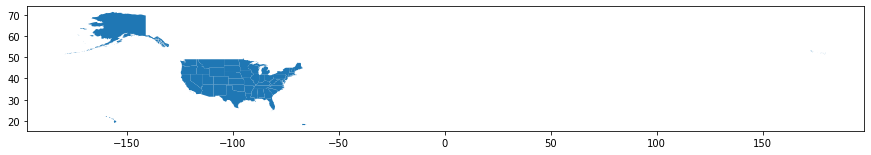

In [48]:
country = geopandas.read_file('gz_2010_us_040_00_5m.json')
country.plot(figsize=(15, 5))

In [49]:
country

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935..."
7,0400000US10,10,Delaware,,1948.543,"MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ..."
8,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03860 38.79151, -77.03890 38.800..."
9,0400000US12,12,Florida,,53624.759,"MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ..."


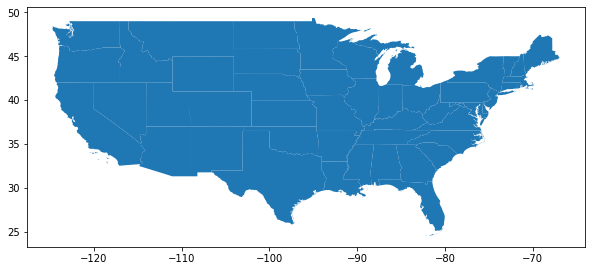

In [50]:
country = country[(country['NAME'] != 'Alaska') & (country['NAME'] != 'Hawaii') & (country['NAME'] != 'Puerto Rico')]
country.plot(figsize=(10, 5))

In [51]:
# join the geodataframe with the cleaned up csv dataframe
merged = country.set_index('NAME').join(unemp.set_index('State'))
merged.head(53)

,GEO_ID,STATE,LSAD,CENSUSAREA,geometry,Rate
NAME,,,,,,
Alabama,0400000US01,01,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",10.2
Arizona,0400000US04,04,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",8.1
Arkansas,0400000US05,05,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",6.7
California,0400000US06,06,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",11.6
Colorado,0400000US08,08,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9...",8.8
Connecticut,0400000US09,09,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935...",4.1
Delaware,0400000US10,10,,1948.543,"MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ...",10.4
District of Columbia,0400000US11,11,,61.048,"POLYGON ((-77.03860 38.79151, -77.03890 38.800...",6
Florida,0400000US12,12,,53624.759,"MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ...",10.1


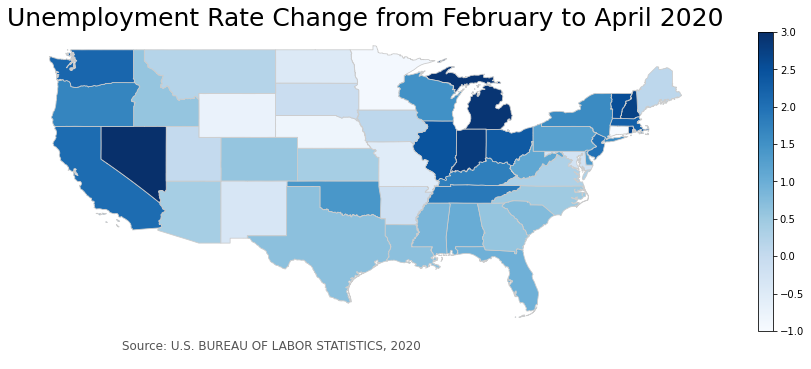

In [63]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Rate'
# set the range for the choropleth
vmin, vmax = -1, 3
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 5.5))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Unemployment Rate Change from February to April 2020', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: U.S. BUREAU OF LABOR STATISTICS, 2020',xy=(0.15, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [0]:
# Save image
fig.savefig('map_export.png', dpi=300)



*   Elemento de la lista
*   Elemento de la lista


